# https://scipython.com/book2/chapter-6-numpy/examples/the-height-of-liquid-in-a-spherical-tank/

/var/folders/5k/bf4syt7x1zjbhc6b28srzzym0000gn/T/ipykernel_77984/784238558.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  h[i] = roots[(0 <= roots) & (roots <= 2*R.value)][0]


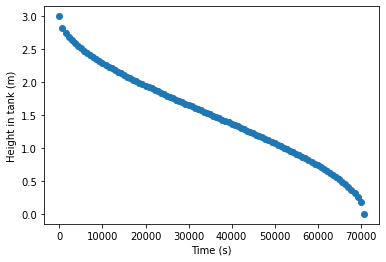

In [2]:
from physipy import m, units, s, setup_matplotlib
setup_matplotlib()

import numpy as np
import matplotlib.pyplot as plt
Polynomial  = np.polynomial.Polynomial

# Radius of the spherical tank in m
R = 1.5 * m
# Flow rate out of the tank, m^3.s-1
F = 2.e-4 * m**3/s
# Total volume of the tank
V0 = 4/3 * np.pi * R**3
# Total time taken for the tank to empty
T = V0 / F

# coefficients of the quadratic and cubic terms
# of p(h), the polynomial to be solved for h
c2, c3 = np.pi * R, -np.pi / 3

N = 100
# array of N time points between 0 and T inclusive
time = np.linspace(0*s, T, N)
# create the corresponding array of heights h(t)
h = np.zeros(N)
for i, t in enumerate(time):
    c0 = F*t - V0
    p = Polynomial([c0.value, 0, c2.value, c3])
    # find the three roots to this polynomial
    roots = p.roots()
    # we want the one root for which 0 <= h <= 2R
    h[i] = roots[(0 <= roots) & (roots <= 2*R.value)][0]

h = h*m

fig, ax = plt.subplots()
ax.plot(time, h, 'o')
ax.set_xlabel("Time (" + str(ax.xaxis.get_label().get_text()) + ")")
ax.set_ylabel("Height in tank (" + str(ax.yaxis.get_label().get_text()) + ")")
plt.show()

# https://scipython.com/book2/chapter-6-numpy/examples/mesh-analysis-of-a-electrical-network/

In [2]:
from physipy import m, units, s, setup_matplotlib
setup_matplotlib()
import numpy as np

ohm = units["ohm"]
volt = units["V"]

R = np.array([[50, 0, -30],
              [0, 40, -20],
              [-30, -20, 100]])*ohm
V = np.array([80, 80, 0]) * volt
I = np.linalg.inv(R) @ V
I

<Quantity : [2.33333333 2.61111111 1.22222222] A, symbol=UndefinedSymbol**2>